<a href="https://colab.research.google.com/github/vanditaagarwal/Kmeans_and_Gaussian_Mixture_Model_Clustering/blob/main/M20MA208_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(a) **First part**

In [ ]:
# Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import math
style.use('ggplot')

**Selection of Data Set**
*  My IITJ roll number is M20MA208.
*  So, yy=20, and abc=208
*  Since yy=20, then v1=1
*  As abc=208, so 4%208=0
*  So the binary representation of 0 is 000, where v2=v3=v4=0
*  Then G=[1 0 0 0]
*  So, the number of ones in G is one.
*  Hence my dataset is Count = 1: 1. IRIS dataset

In [ ]:
# Loading the data - Since my roll number is M20MA208, so using the operation mentioned in the question,
# my dataset is Count = 1: 1.IRIS dataset.

df = pd.read_csv(r"/content/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Initializing x and y with features and labels

x=df.drop(['species'],axis=1).values
x
y=df['species']

In [ ]:
# Replacing the categorical labels with numeric labels, since there are three
# categorical labels,"'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'" so we are assigning 0,1,2 to them respectively.

y.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                        [0, 1, 2], inplace=True)
truelabels=y.values

In [ ]:
# Implementing Kmeans Clustering

class K_Means_Clustering:
	def __init__(self, k =3, tol = 0.0001, itr = 500):
		self.k = k
		self.tol = tol
		self.itr = itr

	def fit(self, X):

		self.centroids = {}

		# assigning first 'k' elements in the dataset as our initial centroids
		for i in range(self.k):
			self.centroids[i] = X[i]


		for i in range(self.itr):
			self.classes = {}
			for i in range(self.k):
				self.classes[i] = []

			# calculating euclidean distance between the data points and centroids and selecting the nearest centroid
			# and based on that, assigning that data point to the nearest cluster
			for features in X:
				dist = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
				categorization = dist.index(min(dist))
				self.classes[categorization].append(features)

			previous = dict(self.centroids)

			# updating the centroid values by taking mean of all the cluster datapoints
			for categorization in self.classes:
				self.centroids[categorization] = np.average(self.classes[categorization], axis = 0)

			isOpt = True   #checking for optimum value

			for centroid in self.centroids:

				orig_centroid = previous[centroid]
				new_centroid = self.centroids[centroid]

				if np.sum((new_centroid - orig_centroid)/orig_centroid * 100.0) > self.tol:
					isOpt = False

			#break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)
			if isOpt:
				break

	def pred(self, X):
		dist = [np.linalg.norm(X - self.centroids[centroid]) for centroid in self.centroids]
		categorization = dist.index(min(dist))
		return categorization


In [ ]:
# Since there are three categorical variables in the dataset, so our ideal clusters ic k=3
# So, first I will see my modal for k=3 clusters. Then for different values of k.

# Fitting data to the model for k=3 clusters

km = K_Means_Clustering(3)  # Since there are 3 classes in my dataset, so we would divide it into three clusters
km.fit(x)
predictedlabels=km.classes
#print(predictedlabels)

In [ ]:
permutation_1 = np.array([mode(y[km.pred(x) == i]).mode.item() for i in range(km.k)])
permuted_prediction_1 = permutation_1[km.pred(x)]

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(truelabels, permuted_prediction_1)

df['predictedlabels2']=km.classes

KeyError: ignored

In [ ]:
total=np.sum(conf_mat)
diagonal=np.sum(np.diag(conf_mat))

In [ ]:
accuracy=(diagonal/total)

In [ ]:
recall=np.diag(conf_mat)/np.sum(conf_mat,axis=1)
recall=np.mean(recall)

In [ ]:
precision=np.diag(conf_mat)/np.sum(conf_mat,axis=0)
precision=np.mean(precision)

In [ ]:
f1_score=(2*precision*recall)/(precision+recall)

In [ ]:
# Displaying centroids of k means for k=3 clusters

print(km.centroids)

{0: array([6.85384615, 3.07692308, 5.71538462, 2.05384615]), 1: array([5.88360656, 2.74098361, 4.38852459, 1.43442623]), 2: array([5.006, 3.418, 1.464, 0.244])}


In [ ]:
# Displaying the data points in each of three clusters

print(km.classes[0])
print(km.classes[1])
print(km.classes[2])


[array([7. , 3.2, 4.7, 1.4]), array([6.9, 3.1, 4.9, 1.5]), array([6.7, 3. , 5. , 1.7]), array([6.3, 3.3, 6. , 2.5]), array([7.1, 3. , 5.9, 2.1]), array([6.3, 2.9, 5.6, 1.8]), array([6.5, 3. , 5.8, 2.2]), array([7.6, 3. , 6.6, 2.1]), array([7.3, 2.9, 6.3, 1.8]), array([6.7, 2.5, 5.8, 1.8]), array([7.2, 3.6, 6.1, 2.5]), array([6.5, 3.2, 5.1, 2. ]), array([6.4, 2.7, 5.3, 1.9]), array([6.8, 3. , 5.5, 2.1]), array([6.4, 3.2, 5.3, 2.3]), array([6.5, 3. , 5.5, 1.8]), array([7.7, 3.8, 6.7, 2.2]), array([7.7, 2.6, 6.9, 2.3]), array([6.9, 3.2, 5.7, 2.3]), array([7.7, 2.8, 6.7, 2. ]), array([6.7, 3.3, 5.7, 2.1]), array([7.2, 3.2, 6. , 1.8]), array([6.4, 2.8, 5.6, 2.1]), array([7.2, 3. , 5.8, 1.6]), array([7.4, 2.8, 6.1, 1.9]), array([7.9, 3.8, 6.4, 2. ]), array([6.4, 2.8, 5.6, 2.2]), array([6.1, 2.6, 5.6, 1.4]), array([7.7, 3. , 6.1, 2.3]), array([6.3, 3.4, 5.6, 2.4]), array([6.4, 3.1, 5.5, 1.8]), array([6.9, 3.1, 5.4, 2.1]), array([6.7, 3.1, 5.6, 2.4]), array([6.9, 3.1, 5.1, 2.3]), array([6.8, 3

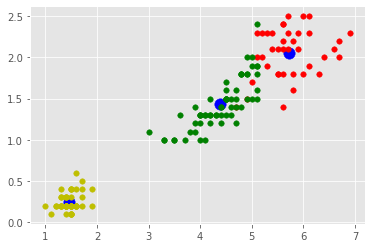

In [ ]:
# Plotting Clusters (taking third and fourth column i.e., petal length and petal width)

colors = 10*["r", "g", "y", "b", "k"]

for centroid in km.centroids:
  plt.scatter(km.centroids[centroid][2], km.centroids[centroid][3], s = 130, color='b', marker = "o")

for categorization in km.classes:
  color = colors[categorization]
  for features in km.classes[categorization]:
    plt.scatter(features[2], features[3], color = color,s = 30)

In [ ]:
#y_kmeans = km.fit(x)

In [ ]:
#plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
#            s = 100, c = 'red', label = 'Iris-setosa')
#plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
#            s = 100, c = 'blue', label = 'Iris-versicolour')
#plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
#            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
#centeres=km.centroids.values
#plt.scatter(centeres[:,0], centeres[:,1], s = 100, c = 'black', label = 'Centroids')

#plt.legend()

In [ ]:
# Fitting data to the model for k=4 clusters

km = K_Means_Clustering(4)  # Since there are 3 classes in my dataset, so we would divide it into three clusters
km.fit(x)

In [ ]:
# Displaying centroids of k means for k=4 clusters

print(km.centroids)

{0: array([6.9125  , 3.1     , 5.846875, 2.13125 ]), 1: array([6.23658537, 2.85853659, 4.80731707, 1.62195122]), 2: array([5.006, 3.418, 1.464, 0.244]), 3: array([5.52962963, 2.62222222, 3.94074074, 1.21851852])}


In [ ]:
# Displaying the data points in each of four clusters

print(km.classes[0])
print(km.classes[1])
print(km.classes[2])
print(km.classes[3])


[array([6.3, 3.3, 6. , 2.5]), array([7.1, 3. , 5.9, 2.1]), array([6.3, 2.9, 5.6, 1.8]), array([6.5, 3. , 5.8, 2.2]), array([7.6, 3. , 6.6, 2.1]), array([7.3, 2.9, 6.3, 1.8]), array([6.7, 2.5, 5.8, 1.8]), array([7.2, 3.6, 6.1, 2.5]), array([6.8, 3. , 5.5, 2.1]), array([6.4, 3.2, 5.3, 2.3]), array([6.5, 3. , 5.5, 1.8]), array([7.7, 3.8, 6.7, 2.2]), array([7.7, 2.6, 6.9, 2.3]), array([6.9, 3.2, 5.7, 2.3]), array([7.7, 2.8, 6.7, 2. ]), array([6.7, 3.3, 5.7, 2.1]), array([7.2, 3.2, 6. , 1.8]), array([6.4, 2.8, 5.6, 2.1]), array([7.2, 3. , 5.8, 1.6]), array([7.4, 2.8, 6.1, 1.9]), array([7.9, 3.8, 6.4, 2. ]), array([6.4, 2.8, 5.6, 2.2]), array([7.7, 3. , 6.1, 2.3]), array([6.3, 3.4, 5.6, 2.4]), array([6.4, 3.1, 5.5, 1.8]), array([6.9, 3.1, 5.4, 2.1]), array([6.7, 3.1, 5.6, 2.4]), array([6.9, 3.1, 5.1, 2.3]), array([6.8, 3.2, 5.9, 2.3]), array([6.7, 3.3, 5.7, 2.5]), array([6.7, 3. , 5.2, 2.3]), array([6.2, 3.4, 5.4, 2.3])]
[array([7. , 3.2, 4.7, 1.4]), array([6.4, 3.2, 4.5, 1.5]), array([6.9, 

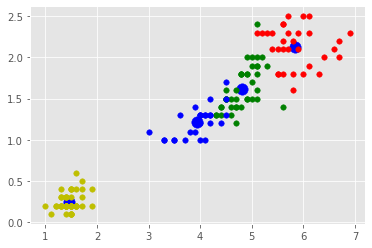

In [ ]:
# Plotting Clusters (taking third and fourth column i.e., petal length and petal width)

colors = 10*["r", "g", "y", "b", "k"]

for centroid in km.centroids:
  plt.scatter(km.centroids[centroid][2], km.centroids[centroid][3], s = 130, color='b', marker = "o")

for categorization in km.classes:
  color = colors[categorization]
  for features in km.classes[categorization]:
    plt.scatter(features[2], features[3], color = color,s = 30)

In [ ]:
# Fitting data to the model for k=5 clusters

km = K_Means_Clustering(5)  # Since there are 3 classes in my dataset, so we would divide it into three clusters
km.fit(x)

In [ ]:
# Displaying centroids of k means for k=5 clusters

print(km.centroids)

{0: array([6.9125  , 3.1     , 5.846875, 2.13125 ]), 1: array([6.23658537, 2.85853659, 4.80731707, 1.62195122]), 2: array([4.71304348, 3.12173913, 1.4173913 , 0.19130435]), 3: array([5.52962963, 2.62222222, 3.94074074, 1.21851852]), 4: array([5.25555556, 3.67037037, 1.5037037 , 0.28888889])}


In [ ]:
# Displaying the data points in each of five clusters

print(km.classes[0])
print(km.classes[1])
print(km.classes[2])
print(km.classes[3])
print(km.classes[4])


[array([6.3, 3.3, 6. , 2.5]), array([7.1, 3. , 5.9, 2.1]), array([6.3, 2.9, 5.6, 1.8]), array([6.5, 3. , 5.8, 2.2]), array([7.6, 3. , 6.6, 2.1]), array([7.3, 2.9, 6.3, 1.8]), array([6.7, 2.5, 5.8, 1.8]), array([7.2, 3.6, 6.1, 2.5]), array([6.8, 3. , 5.5, 2.1]), array([6.4, 3.2, 5.3, 2.3]), array([6.5, 3. , 5.5, 1.8]), array([7.7, 3.8, 6.7, 2.2]), array([7.7, 2.6, 6.9, 2.3]), array([6.9, 3.2, 5.7, 2.3]), array([7.7, 2.8, 6.7, 2. ]), array([6.7, 3.3, 5.7, 2.1]), array([7.2, 3.2, 6. , 1.8]), array([6.4, 2.8, 5.6, 2.1]), array([7.2, 3. , 5.8, 1.6]), array([7.4, 2.8, 6.1, 1.9]), array([7.9, 3.8, 6.4, 2. ]), array([6.4, 2.8, 5.6, 2.2]), array([7.7, 3. , 6.1, 2.3]), array([6.3, 3.4, 5.6, 2.4]), array([6.4, 3.1, 5.5, 1.8]), array([6.9, 3.1, 5.4, 2.1]), array([6.7, 3.1, 5.6, 2.4]), array([6.9, 3.1, 5.1, 2.3]), array([6.8, 3.2, 5.9, 2.3]), array([6.7, 3.3, 5.7, 2.5]), array([6.7, 3. , 5.2, 2.3]), array([6.2, 3.4, 5.4, 2.3])]
[array([7. , 3.2, 4.7, 1.4]), array([6.4, 3.2, 4.5, 1.5]), array([6.9, 

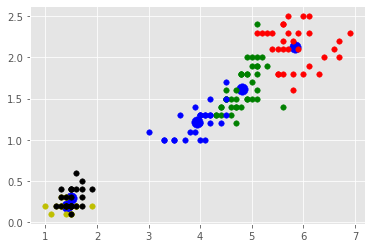

In [ ]:
# Plotting Clusters (taking third and fourth column i.e., petal length and petal width)

colors = 10*["r", "g", "y", "b", "k"]

for centroid in km.centroids:
  plt.scatter(km.centroids[centroid][2], km.centroids[centroid][3], s = 130, color='b', marker = "o")

for categorization in km.classes:
  color = colors[categorization]
  for features in km.classes[categorization]:
    plt.scatter(features[2], features[3], color = color,s = 30)

In [ ]:
# Fitting data to the model for k=6 clusters

km = K_Means_Clustering(6)  # Since there are 3 classes in my dataset, so we would divide it into three clusters
km.fit(x)

In [ ]:
# Displaying centroids of k means for k=6 clusters

print(km.centroids)

{0: array([5.1375 , 3.45625, 1.48125, 0.29375]), 1: array([4.81428571, 3.07142857, 1.5       , 0.18571429]), 2: array([4.5   , 3.1875, 1.275 , 0.2   ]), 3: array([5.88360656, 2.74098361, 4.38852459, 1.43442623]), 4: array([5.39166667, 3.925     , 1.525     , 0.275     ]), 5: array([6.85384615, 3.07692308, 5.71538462, 2.05384615])}


In [ ]:
# Displaying the data points in each of six clusters

print(km.classes[0])
print(km.classes[1])
print(km.classes[2])
print(km.classes[3])
print(km.classes[4])
print(km.classes[5])


[array([5.1, 3.5, 1.4, 0.2]), array([5. , 3.6, 1.4, 0.2]), array([5. , 3.4, 1.5, 0.2]), array([5.1, 3.5, 1.4, 0.3]), array([5.4, 3.4, 1.7, 0.2]), array([5.1, 3.7, 1.5, 0.4]), array([5.1, 3.3, 1.7, 0.5]), array([5. , 3.4, 1.6, 0.4]), array([5.2, 3.5, 1.5, 0.2]), array([5.2, 3.4, 1.4, 0.2]), array([5.4, 3.4, 1.5, 0.4]), array([5.5, 3.5, 1.3, 0.2]), array([5.1, 3.4, 1.5, 0.2]), array([5. , 3.5, 1.3, 0.3]), array([5. , 3.5, 1.6, 0.6]), array([5. , 3.3, 1.4, 0.2])]
[array([4.9, 3. , 1.4, 0.2]), array([4.6, 3.1, 1.5, 0.2]), array([4.9, 3.1, 1.5, 0.1]), array([4.8, 3.4, 1.6, 0.2]), array([4.8, 3. , 1.4, 0.1]), array([4.8, 3.4, 1.9, 0.2]), array([5. , 3. , 1.6, 0.2]), array([4.7, 3.2, 1.6, 0.2]), array([4.8, 3.1, 1.6, 0.2]), array([4.9, 3.1, 1.5, 0.1]), array([5. , 3.2, 1.2, 0.2]), array([4.9, 3.1, 1.5, 0.1]), array([4.5, 2.3, 1.3, 0.3]), array([4.8, 3. , 1.4, 0.3])]
[array([4.7, 3.2, 1.3, 0.2]), array([4.6, 3.4, 1.4, 0.3]), array([4.4, 2.9, 1.4, 0.2]), array([4.3, 3. , 1.1, 0.1]), array([4.6,

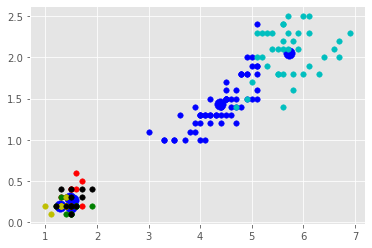

In [ ]:
# Plotting Clusters (taking third and fourth column i.e., petal length and petal width)

colors = 10*["r", "g", "y", "b", "k","c"]

for centroid in km.centroids:
  plt.scatter(km.centroids[centroid][2], km.centroids[centroid][3], s = 130, color='b', marker = "o")

for categorization in km.classes:
  color = colors[categorization]
  for features in km.classes[categorization]:
    plt.scatter(features[2], features[3], color = color,s = 30)

In [ ]:
# Fitting data to the model for k=8 clusters

km = K_Means_Clustering(8)  # Since there are 3 classes in my dataset, so we would divide it into three clusters
km.fit(x)

In [ ]:
# Displaying centroids of k means for k=8 clusters

print(km.centroids)

{0: array([5.2       , 3.56      , 1.46666667, 0.24666667]), 1: array([4.82857143, 3.11428571, 1.45      , 0.17857143]), 2: array([4.4 , 2.88, 1.28, 0.2 ]), 3: array([5.88360656, 2.74098361, 4.38852459, 1.43442623]), 4: array([5.52857143, 4.04285714, 1.47142857, 0.28571429]), 5: array([6.85384615, 3.07692308, 5.71538462, 2.05384615]), 6: array([4.6 , 3.5 , 1.2 , 0.25]), 7: array([4.97142857, 3.45714286, 1.68571429, 0.35714286])}


In [ ]:
# Displaying the data points in each of five clusters

print(km.classes[0])
print(km.classes[1])
print(km.classes[2])
print(km.classes[3])
print(km.classes[4])
print(km.classes[5])
print(km.classes[6])
print(km.classes[7])

[array([5.1, 3.5, 1.4, 0.2]), array([5. , 3.6, 1.4, 0.2]), array([5.4, 3.7, 1.5, 0.2]), array([5.1, 3.5, 1.4, 0.3]), array([5.1, 3.8, 1.5, 0.3]), array([5.4, 3.4, 1.7, 0.2]), array([5.1, 3.7, 1.5, 0.4]), array([5.2, 3.5, 1.5, 0.2]), array([5.2, 3.4, 1.4, 0.2]), array([5.4, 3.4, 1.5, 0.4]), array([5.5, 3.5, 1.3, 0.2]), array([5.1, 3.4, 1.5, 0.2]), array([5. , 3.5, 1.3, 0.3]), array([5.1, 3.8, 1.6, 0.2]), array([5.3, 3.7, 1.5, 0.2])]
[array([4.9, 3. , 1.4, 0.2]), array([4.7, 3.2, 1.3, 0.2]), array([4.6, 3.1, 1.5, 0.2]), array([4.9, 3.1, 1.5, 0.1]), array([4.8, 3. , 1.4, 0.1]), array([5. , 3. , 1.6, 0.2]), array([4.7, 3.2, 1.6, 0.2]), array([4.8, 3.1, 1.6, 0.2]), array([4.9, 3.1, 1.5, 0.1]), array([5. , 3.2, 1.2, 0.2]), array([4.9, 3.1, 1.5, 0.1]), array([4.8, 3. , 1.4, 0.3]), array([4.6, 3.2, 1.4, 0.2]), array([5. , 3.3, 1.4, 0.2])]
[array([4.4, 2.9, 1.4, 0.2]), array([4.3, 3. , 1.1, 0.1]), array([4.4, 3. , 1.3, 0.2]), array([4.5, 2.3, 1.3, 0.3]), array([4.4, 3.2, 1.3, 0.2])]
[array([6.4

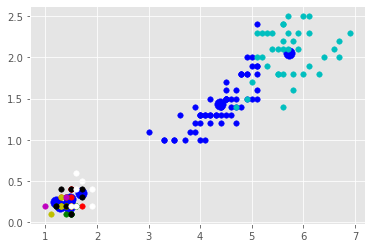

In [ ]:
# Plotting Clusters (taking third and fourth column i.e., petal length and petal width)

colors = 10*["r", "g", "y", "b", "k","c","m","w"]

for centroid in km.centroids:
  plt.scatter(km.centroids[centroid][2], km.centroids[centroid][3], s = 130, color='b', marker = "o")

for categorization in km.classes:
  color = colors[categorization]
  for features in km.classes[categorization]:
    plt.scatter(features[2], features[3], color = color,s = 30)

(b) **Second part**

In [ ]:
#Importing Libraries

import numpy as np
import math
import pandas as pd
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
# data has already been loaded in the first part.
# So, here I am just assigning x and y.
# Also, I am replacing categorical values with numeric values in y.
X=df.drop(['species'],axis=1)
x=X.values
y=df['species']
y.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                        [0, 1, 2], inplace=True)
y=y.values
print(y)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
# Implementing GMM using Expectation-Maximization

from scipy.stats import multivariate_normal

class GMM_Clustering:
    def __init__(self, k, itr=5):
        self.k = k
        self.itr = int(itr)
        self.weights = []
        self.pi = []

    def initialization(self, X):
        self.shape = X.shape
        self.n, self.m = self.shape


        # giving prior probablities(initial weights) to each cluster and storing them in pi or P(Z_k=j)
        for i in range(self.k):
          self.pi.append(1 / self.k)
        #self.pi = np.full(shape=self.k, fill_value=1/self.k)

        # giving initial posterior probabilities(weights) to each data point wrt to each cluster or P(Zi=j/Xi)
        for i in range(self.k):
          self.weights.append(1 / self.k)
        #self.weights = np.full(shape=self.shape, fill_value=1/self.k)

        # now dividing dataset randomly into k parts of unequal sizes
        randomly_row = np.random.randint(low=0, high=self.n, size=self.k)

        # initializing values of mean of k Gaussians
        self.mu = [  X[row_index,:] for row_index in randomly_row ]

        # initializing values of covariance matrices of k Gaussians
        self.sigma = [ np.cov(X.T) for _ in range(self.k) ]

    # Expectation-Step: update weights and pi holding mu and sigma constant
    def expectation_step(self, X):
        # updating posterior probabilities P(Xi/Zi=j)
        self.weights = self.posterior_prob(X)
        # mean of sum of probability of all data points wrt to one cluster is new updated probability of cluster k or (pi)k
        self.pi = self.weights.mean(axis=0)
        print("weights are: ", self.weights)
        print("values of pi: ", self.pi)

    # Maximization-Step: update mu and sigma holding pi and weights constant
    def maximization_step(self, X):
        for i in range(self.k):
            weight = self.weights[:, [i]]
            total_weight = weight.sum()

            self.mu[i] = (X * weight).sum(axis=0) / total_weight
            self.sigma[i] = np.cov(X.T,aweights=(weight/total_weight).flatten(), bias=True)
        print("means are: ", self.mu[i])
        print("covariances are: ", self.sigma[i])

    # To cluster data points
    def fit(self, X):
        # initializing parameters like weights, pi, mu, sigma of all Gaussians in dataset X
        self.initialization(X)
        plt.figure(figsize=(16, 25))

        for iteration in range(self.itr):
          permutation = np.array([mode(y[gmm.predict(X) == i]).mode.item() for i in range(gmm.k)])
          permuted_prediction = permutation[gmm.predict(X)]
          print('\nThe accuracy of the permuted prediction against target before iteration ',iteration+1,end="")
          print(': ',np.mean(y == permuted_prediction))
          print('\n')
          confusion_matrix(y, permuted_prediction)
          plt.title(' Iteration Cluster')
          plt.subplot(5,3,iteration+1)
          clusters=permuted_prediction
          plt.xlabel(iris.feature_names[0])
          plt.ylabel(iris.feature_names[1])
          plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')
          plt.grid()
          plt.tight_layout()
          # iterate to update the value of P(Xi/Zi=j) and (pi)k
          self.expectation_step(X)
          # iterate to update the value of mu and sigma as the clusters shift
          self.maximization_step(X)


    # predicts posterior probability of each data point wrt each cluster
    def posterior_prob(self, X):
        # Creates a n*k matrix denoting probability of each point wrt each cluster
        likelihood = np.zeros( (self.n, self.k) )
        for i in range(self.k):
            distribution = multivariate_normal(mean=self.mu[i],cov=self.sigma[i])
            # pdf : probability denisty function
            likelihood[:,i] = distribution.pdf(X)

        numerator = likelihood * self.pi
        denominator = numerator.sum(axis=1)[:, np.newaxis]
        weights = numerator / denominator
        return weights

    # predict function
    def predict(self, X):
        weights = self.posterior_prob(X)
        # datapoint belongs to cluster with maximum probability
        # returns this value
        return np.argmax(weights, axis=1)

    def display(self, X):
      for i in self.k:
        print("mu: ", self.mu[i])
        print("Covariance: ", self.sigma[i])
        print("prior probabilities: ", self.pi[i])
        print("posterior probabilities: ", self.weights[i])


The accuracy of the permuted prediction against target before iteration  1:  0.6266666666666667


weights are:  [[1.28830875e-01 3.83146092e-01 4.88023033e-01]
 [5.88003324e-02 8.76510970e-01 6.46886979e-02]
 [6.87823765e-02 8.60892661e-01 7.03249622e-02]
 [4.05075846e-02 9.46452235e-01 1.30401808e-02]
 [1.44733066e-01 4.12745888e-01 4.42521045e-01]
 [1.02647138e-01 5.28652490e-02 8.44487613e-01]
 [9.99872421e-02 8.21091831e-01 7.89209265e-02]
 [1.28679416e-01 6.52374852e-01 2.18945731e-01]
 [1.89068885e-02 9.77528127e-01 3.56498491e-03]
 [5.61638250e-02 9.03851062e-01 3.99851128e-02]
 [9.01460082e-02 9.91654541e-02 8.10688538e-01]
 [1.00969848e-01 8.36746806e-01 6.22833464e-02]
 [4.07708786e-02 9.32696330e-01 2.65327918e-02]
 [2.04984605e-02 9.72051771e-01 7.44976815e-03]
 [7.18509761e-03 1.30596588e-03 9.91508937e-01]
 [1.23100819e-02 8.63324113e-04 9.86826594e-01]
 [2.82234926e-02 1.01075716e-02 9.61668936e-01]
 [1.25424151e-01 2.96959134e-01 5.77616715e-01]
 [5.66146853e-02 2.5588

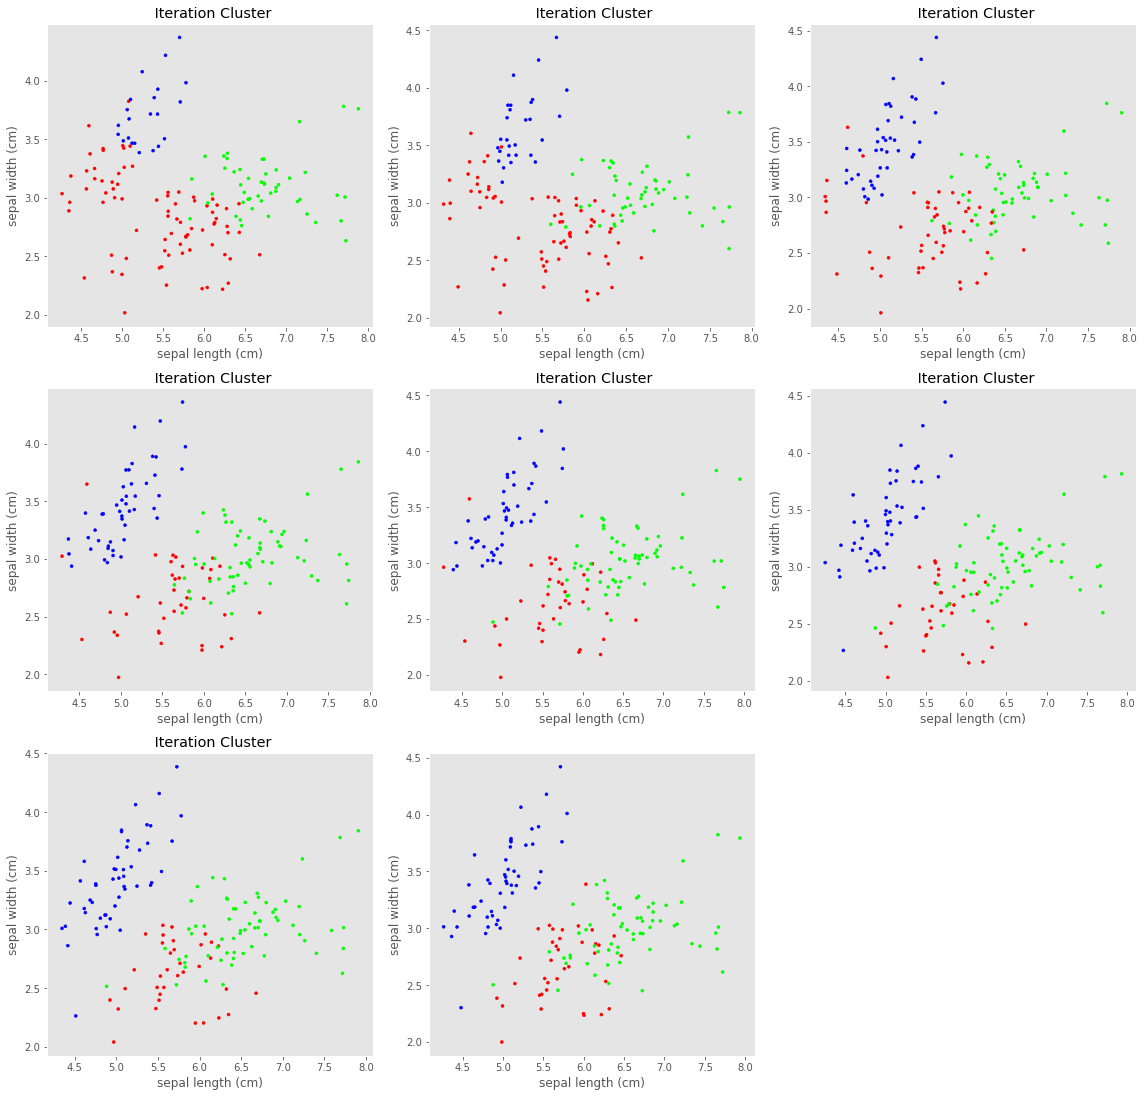

In [ ]:
# Fitting the same IRIS dataset in GMM model

np.random.seed(42)
gmm = GMM_Clustering(k=3, itr=8)
gmm.fit(x)

[[50  0  0]
 [ 0 42  8]
 [ 0  1 49]]


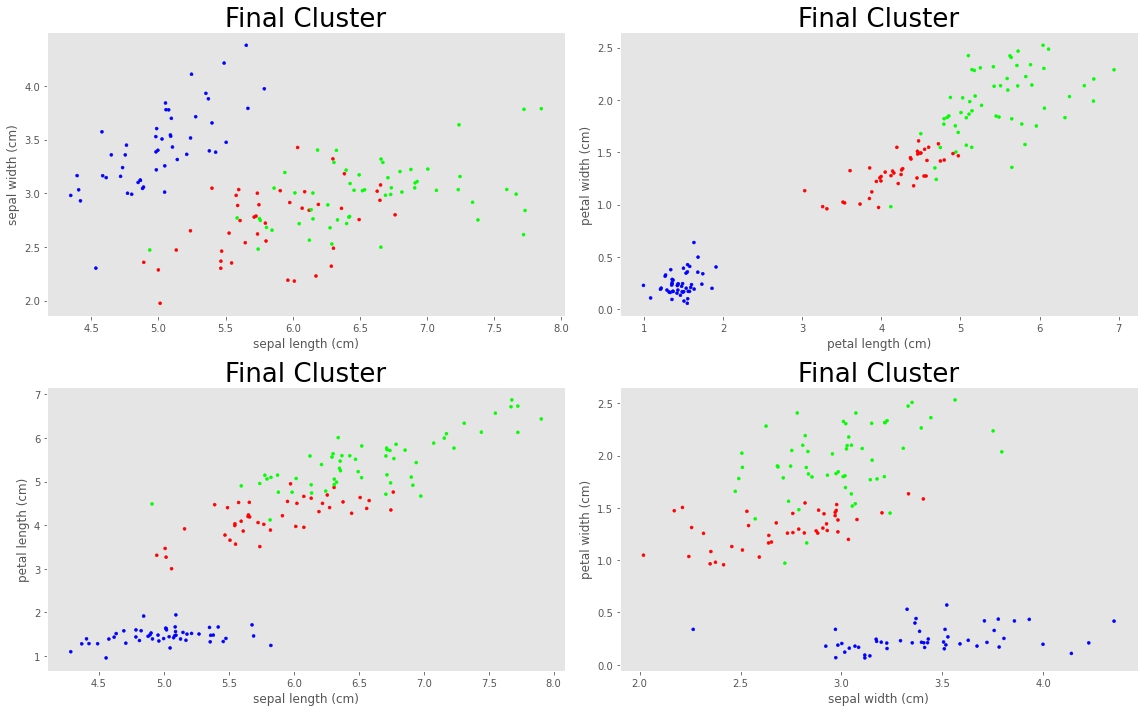

In [ ]:
# Plotting

colors = 10*["r", "g", "b"]

def jitter(x):
  z = x + np.random.uniform(low=-0.05, high=0.05, size=x.shape)
  return z

def plot_axis_pairs(X, axis_pairs, clusters, classes):
    n_rows = len(axis_pairs) // 2
    n_cols = 2
    plt.figure(figsize=(16, 10))
    # iterates through all the plots
    for index, (x_axis, y_axis) in enumerate(axis_pairs):
        plt.subplot(n_rows, n_cols, index+1)
        plt.title('Final Cluster',fontsize=26)
        plt.xlabel(iris.feature_names[x_axis])
        plt.ylabel(iris.feature_names[y_axis])
        plt.scatter(jitter(X[:, x_axis]), jitter(X[:, y_axis]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')
        plt.grid()
        plt.tight_layout()

permutation = np.array([
    mode(y[gmm.predict(x) == i]).mode.item()
    for i in range(gmm.k)])
permuted_prediction = permutation[gmm.predict(x)]

plot_axis_pairs(X=x, axis_pairs=[
        (0,1), (2,3),
        (0,2), (1,3) ],
    clusters=permuted_prediction,
    classes=y)

print(confusion_matrix(y, permuted_prediction))

(c) **Third part**

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

# for GMM
score = adjusted_rand_score(y, permuted_prediction)
score

0.8345340129274752

In [ ]:
#from sklearn.metrics.cluster import adjusted_rand_score

# for k-means
#score1 = adjusted_rand_score(y, permuted_prediction_1)
#score1

We have also taken GMM clustering along with k-Means Clustering because k means clustering only gives spherical distributions of clusters, and makes hard assignments to clusters.

While, Gaussian Mixture Model (GMM) Clustering also gives ellipsoidal distributions of clusters, and makes 'soft' assignments to clusters.

So, to check better clustering and have a different look of clusters from an ellipsoidal point of view, we also are using the GMM algorithm to get clusters.

For the IRIS dataset, which was measuring what were probably normally distributed features, the GMM clustering worked better at finding the actual species labels, as measured by the adjusted Rand score.